In [21]:
from sklearn import model_selection, datasets, linear_model, metrics
from matplotlib.colors import ListedColormap

In [13]:
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация данных

In [11]:
clf_data, clf_target = datasets.make_classification(n_features=2,
                                                   n_informative=2,
                                                   n_classes=2,
                                                   n_redundant=0,
                                                   n_clusters_per_class=1,
                                                   random_state=7)

In [4]:
reg_data, reg_target = datasets.make_regression(n_features=2, n_informative=1,
                                               n_targets=1, noise=5., random_state=7)

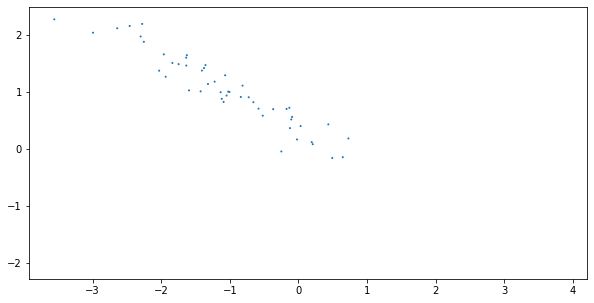

In [20]:
colors = ListedColormap(['red', 'blue'])
plt.figure(figsize(10,5))
plt.scatter(list(map(lambda x: x[0], clf_data)),
            list(map(lambda x: x[1], clf_data)),clf_target, cmap=colors)
plt.show()

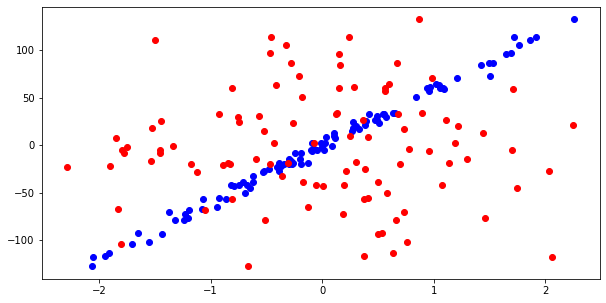

In [10]:
pylab.scatter(list(map(lambda x:x[1], reg_data)), reg_target, color='b')
pylab.scatter(list(map(lambda x:x[0], reg_data)), reg_target, color='r')

In [22]:
clf_train_data, clf_test_data, clf_train_labels, clf_test_labels = model_selection.train_test_split(clf_data, clf_target, test_size=0.3, random_state=1)

In [23]:
reg_train_data, reg_test_data, reg_train_labels, reg_test_labels = model_selection.train_test_split(reg_data, reg_target, test_size=0.3, random_state=1)

### Метрики качества в задачах классификации

#### Обучение модели классификации

In [24]:
classifier = linear_model.SGDClassifier(loss='log', random_state=1)

In [25]:
classifier.fit(clf_train_data, clf_train_labels)

SGDClassifier(loss='log', random_state=1)

In [26]:
predictions = classifier.predict(clf_test_data)

In [27]:
probability_predictions = classifier.predict_proba(clf_test_data)

In [29]:
print(clf_test_labels)

[1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [30]:
print(predictions)

[1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0]


In [32]:
print(probability_predictions)

[[0.00000000e+00 1.00000000e+00]
 [9.99999997e-01 2.90779994e-09]
 [9.99990982e-01 9.01818055e-06]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 7.01333183e-14]
 [5.16838702e-07 9.99999483e-01]
 [6.66133815e-16 1.00000000e+00]
 [1.00000000e+00 6.21822808e-13]
 [0.00000000e+00 1.00000000e+00]
 [9.99999998e-01 2.30155106e-09]
 [9.99999697e-01 3.03286910e-07]
 [4.06373790e-03 9.95936262e-01]
 [0.00000000e+00 1.00000000e+00]
 [9.84496051e-09 9.99999990e-01]
 [1.00000000e+00 2.85780656e-10]
 [9.96681204e-01 3.31879568e-03]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 6.58409203e-15]
 [1.00000000e+00 1.62031980e-14]
 [7.25799421e-11 1.00000000e+00]
 [9.99999999e-01 1.11892650e-09]
 [9.99999727e-01 2.73211585e-07]
 [8.97506031e-01 1.02493969e-01]
 [1.00000000e+00 1.48816090e-12]
 [9.99999504e-01 4.96472653e-07]
 [9.94751478e-01 5.24852191e-03]
 [5.83291617e-01 4.16708383e-01]
 [8.46989145e-12 1.00000000e+00]
 [3.20094202e-02 9.67990580e-01]
 [1.00000000e+00 2.85626467e-13]]


#### accuracy

In [38]:
sum([1 if pair[0]==pair[1] else 0 for pair in zip(clf_test_labels, predictions)])/len(clf_test_labels)

0.9333333333333333

In [39]:
metrics.accuracy_score(clf_test_labels, predictions)

0.9333333333333333

#### confusion matrix

In [40]:
matrix = metrics.confusion_matrix(clf_test_labels, predictions)
print(matrix)
#на основе этой матрицы можно рассчитывать точность, полноту и F-меру

[[17  1]
 [ 1 11]]


In [42]:
matrix.diagonal().sum()

28

#### precision

In [43]:
# точность классификации к нулевому классу
metrics.precision_score(clf_test_labels, predictions, pos_label=0)

0.9444444444444444

In [44]:
metrics.precision_score(clf_test_labels, predictions)

0.9166666666666666

#### recall

In [45]:
# полнота классификации к нулевому классу
metrics.recall_score(clf_test_labels, predictions, pos_label=0)

0.9444444444444444

In [46]:
metrics.recall_score(clf_test_labels, predictions)

0.9166666666666666

#### f1

In [47]:
metrics.f1_score(clf_test_labels, predictions, pos_label=0)

0.9444444444444444

In [48]:
metrics.f1_score(clf_test_labels, predictions)

0.9166666666666666

#### classification report

In [49]:
print(metrics.classification_report(clf_test_labels, predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



#### ROC curve

In [50]:
fpr, tpr, _ = metrics.roc_curve(clf_test_labels, probability_predictions[:, 1])

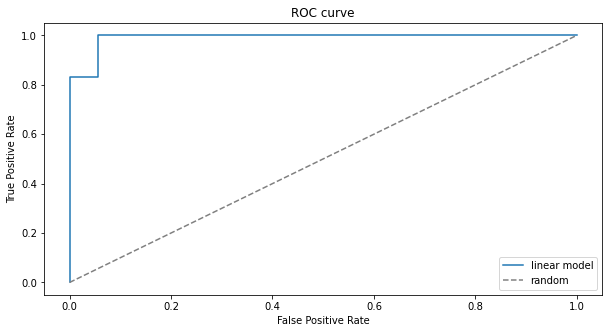

In [56]:
pylab.plot(fpr, tpr, label='linear model')
pylab.plot([0,1], [0,1], '--', color='grey', label='random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc='lower right')
pylab.show()

#### ROC AUC

In [57]:
#пллщадь под ROC-кривой
metrics.roc_auc_score(clf_test_labels, predictions)

0.9305555555555554

In [58]:
metrics.roc_auc_score(clf_test_labels, probability_predictions[:,1])

0.9907407407407407

#### PR AUC

In [59]:
metrics.average_precision_score(clf_test_labels, predictions)

0.873611111111111

#### log_loss

In [60]:
metrics.log_loss(clf_test_labels, probability_predictions[:,1])

0.21767621111290084

## Метрики качества в задачах регресии

#### Обучение регрессионной модели

In [82]:
regressor = linear_model.SGDRegressor(random_state=1, n_iter_no_change=20)

In [83]:
regressor.fit(reg_train_data, reg_train_labels)

SGDRegressor(n_iter_no_change=20, random_state=1)

In [84]:
reg_predictions = regressor.predict(reg_test_data)

In [85]:
print(reg_test_labels)

[   2.67799047    7.06525927  -56.43389936   10.08001896  -22.46817716
  -19.27471232   59.44372825  -21.60494574   32.54682713  -41.89798772
  -18.16390935   32.75688783   31.04095773    2.39589626   -5.04783924
  -70.20925097   86.69034305   18.50402992   32.31573461 -101.81138022
   15.14628858   29.49813932   97.282674     25.88034991  -41.63332253
  -92.11198201   86.7177122     2.13250832  -20.24967575  -27.32511755]


In [86]:
print(reg_predictions)

[ -1.10528035   6.84771392 -51.8819882    5.60417362 -24.12443169
  -8.21439926  64.29438474 -22.02061817  32.14714092 -40.45775375
 -17.57140062  32.58447477  28.63744348  -6.22246937  -2.85280197
 -82.00645827  88.75675598  16.18835816  24.48112293 -93.10222435
  15.72456028  33.52957308 100.26217755  23.14060516 -44.74143963
 -98.70507076  90.50169093   1.00412665 -16.51947704 -23.75267054]


#### mean absolute error

In [87]:
metrics.mean_absolute_error(reg_test_labels, predictions)

36.813584858411886

#### mean squared error

In [69]:
metrics.mean_squared_error(reg_test_labels, predictions)

2251.23258522317

#### root mean squared error

In [88]:
sqrt(metrics.mean_squared_error(reg_test_labels, predictions))

47.44715571267861

#### r2 score

In [89]:
metrics.r2_score(reg_test_labels, reg_predictions)

0.9895784923331762